In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [2]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [3]:
# Male, 60-70, WHITE

In [4]:
gender = "M"
age_b = 60
age_a = 70
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [6]:
med_itemids = [3439, 221794, 228340, 5962, 6296, 7745, 7252, 227694, 46203, 46203, 1097, 2778, 1898, 1226, 6756, 6616, 8074, 6741, 7372, 40550, 41583, 40700, 44280, 41583, 46014, 46522, 46548, 46565, 7325, 50856, 225913,  221824, 90018, 225855, 51008, 6148, 2570, 50962, 45853, 222151, 50972, 30052]

In [7]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [8]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [9]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [10]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [11]:
med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [12]:
med1 = med1[med1.ITEMID.isin(med_itemids)]

In [13]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
586,357,2135-03-22,M,2201-08-02 00:00:00,1,225855,101651,259107.0,2199-10-20 13:00:00,2199-10-20 13:01:00,...,Ceftriaxone,Ceftriaxone,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,0 days 00:56:00,65.0
782,533,2101-07-30,M,NaN,0,221794,100009,253656.0,2162-05-18 08:18:00,2162-05-18 08:19:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 16:23:00,61.0
973,975,2074-05-16,M,2142-06-21 00:00:00,1,221794,175734,286445.0,2142-05-16 16:00:00,2142-05-16 16:01:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 23:45:00,68.0
1016,975,2074-05-16,M,2142-06-21 00:00:00,1,225855,175734,243103.0,2142-06-20 21:49:00,2142-06-20 21:50:00,...,Ceftriaxone,Ceftriaxone,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,36 days 05:34:00,68.0
1155,2208,2120-10-04,M,2191-10-17 00:00:00,1,225855,162248,259196.0,2190-08-20 13:41:00,2190-08-20 13:42:00,...,Ceftriaxone,Ceftriaxone,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,1 days 15:28:00,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320870,77690,2042-04-05,M,NaN,0,227694,121387,247506.0,2110-11-23 07:56:00,2110-11-23 07:57:00,...,Omeprazole (Prilosec),Omeprazole (Prilosec),metavision,inputevents_mv,Medications,dose,Solution,NaN,5 days 15:11:00,69.0
320874,77690,2042-04-05,M,NaN,0,225913,121387,247506.0,2110-11-24 16:00:00,2110-11-24 16:01:00,...,Coumadin (Warfarin),Coumadin (Warfarin),metavision,inputevents_mv,Medications,dose,Solution,NaN,6 days 23:15:00,69.0
321377,43742,2113-08-29,M,2175-12-09 00:00:00,1,221794,191527,216409.0,2175-12-01 22:44:00,2175-12-01 22:45:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 04:29:00,62.0
321549,43786,2078-03-24,M,NaN,0,221794,151092,230331.0,2138-07-16 10:40:00,2138-07-16 10:41:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 21:20:00,60.0


### Med 2

In [14]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [15]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [16]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [17]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [18]:
med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [19]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
155,820,2077-04-26,M,2144-03-24 00:00:00,1,225158,193603,280074.0,2144-02-24 23:56:00,2144-02-24 23:57:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 22:18:00,67.0
156,820,2077-04-26,M,2144-03-24 00:00:00,1,226452,193603,280074.0,2144-02-25 09:00:00,2144-02-25 09:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 07:22:00,67.0
157,820,2077-04-26,M,2144-03-24 00:00:00,1,223262,193603,280074.0,2144-02-25 12:00:00,2144-02-25 12:01:00,...,Insulin - Humalog,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,2 days 10:22:00,67.0
158,820,2077-04-26,M,2144-03-24 00:00:00,1,225975,193603,280074.0,2144-02-25 14:00:00,2144-02-25 14:01:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,2 days 12:22:00,67.0
159,820,2077-04-26,M,2144-03-24 00:00:00,1,223257,193603,280074.0,2144-02-26 08:00:00,2144-02-26 08:01:00,...,Insulin - 70/30,Insulin - 70/30,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 06:22:00,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237480,44069,2064-04-08,M,NaN,0,220864,138192,214441.0,2131-02-16 02:05:00,2131-02-16 04:05:00,...,Albumin 5%,Albumin 5%,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,3 days 09:54:00,67.0
237481,44069,2064-04-08,M,NaN,0,225798,138192,214441.0,2131-02-16 08:00:00,2131-02-16 08:01:00,...,Vancomycin,Vancomycin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 13:50:00,67.0
237482,44069,2064-04-08,M,NaN,0,226452,138192,214441.0,2131-02-16 08:30:00,2131-02-16 08:31:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:20:00,67.0
237483,44069,2064-04-08,M,NaN,0,221456,138192,214441.0,2131-02-16 10:00:00,2131-02-16 11:00:00,...,Calcium Gluconate,Calcium Gluconate,metavision,inputevents_mv,Medications,grams,Solution,NaN,3 days 16:49:00,67.0


In [20]:
med2 = med2[med2.ITEMID.isin(med_itemids)]

In [21]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
450,357,2135-03-22,M,2201-08-02 00:00:00,1,221794,117876,235292.0,2199-12-29 18:35:00,2199-12-29 18:36:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,7 days 19:59:00,65.0
721,975,2074-05-16,M,2142-06-21 00:00:00,1,221794,175734,286445.0,2142-05-16 16:31:00,2142-05-16 16:32:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 00:16:00,68.0
865,2208,2120-10-04,M,2191-10-17 00:00:00,1,225855,162248,259196.0,2190-08-21 14:09:00,2190-08-21 14:10:00,...,Ceftriaxone,Ceftriaxone,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,2 days 15:56:00,70.0
983,3623,2101-07-04,M,2164-02-23 00:00:00,1,221824,178444,260358.0,2164-02-21 02:28:00,2164-02-21 02:29:00,...,Haloperidol (Haldol),Haloperidol (Haldol),metavision,inputevents_mv,Medications,mg,Solution,NaN,6 days 10:04:00,63.0
1103,890,2113-11-30,M,NaN,0,225855,195962,274222.0,2180-12-12 17:36:00,2180-12-12 17:37:00,...,Ceftriaxone,Ceftriaxone,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,5 days 18:33:00,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235921,77654,2077-02-07,M,NaN,0,221794,163742,239066.0,2141-10-09 09:04:00,2141-10-09 09:05:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,5 days 09:58:00,65.0
236067,77690,2042-04-05,M,NaN,0,227694,121387,247506.0,2110-11-24 07:32:00,2110-11-24 07:33:00,...,Omeprazole (Prilosec),Omeprazole (Prilosec),metavision,inputevents_mv,Medications,dose,Solution,NaN,6 days 14:47:00,69.0
236069,77690,2042-04-05,M,NaN,0,225913,121387,247506.0,2110-11-24 17:44:00,2110-11-24 17:45:00,...,Coumadin (Warfarin),Coumadin (Warfarin),metavision,inputevents_mv,Medications,dose,Solution,NaN,7 days 00:59:00,69.0
236440,43742,2113-08-29,M,2175-12-09 00:00:00,1,221794,191527,295473.0,2175-12-07 15:00:00,2175-12-07 15:01:00,...,Furosemide (Lasix),Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,6 days 20:45:00,62.0


## Filter Labs

In [22]:
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/608754289.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))


In [23]:
labs = labs.drop(columns=["Unnamed: 0"])
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
0,249,2075-03-13,F,NaN,0,163327,158975.0,51274,2156-04-27 15:40:00,20.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
1,249,2075-03-13,F,NaN,0,163304,158975.0,50868,2156-04-27 15:40:00,12.0,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
2,249,2075-03-13,F,NaN,0,163317,158975.0,51221,2156-04-27 15:40:00,29.5,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
3,249,2075-03-13,F,NaN,0,163315,158975.0,51146,2156-04-27 15:40:00,0.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
4,249,2075-03-13,F,NaN,0,163316,158975.0,51200,2156-04-27 15:40:00,2.4,...,CATHOLIC,DIVORCED,WHITE,NaN,NaN,GI BLEEDING\COLONOSCOPY,0,1,0 days 00:07:00,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.4,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.1,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.8,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.3,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


In [24]:
labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
28,249,2075-03-13,F,NaN,0,162912,149546.0,51221,2155-02-03 23:26:00,26.60,...,CATHOLIC,DIVORCED,WHITE,2155-02-03 17:43:00,2155-02-03 21:26:00,GI BLEED/ CHEST PAIN,0,1,0 days 03:10:00,80.0
29,249,2075-03-13,F,NaN,0,162914,149546.0,50910,2155-02-04 01:49:00,254.00,...,CATHOLIC,DIVORCED,WHITE,2155-02-03 17:43:00,2155-02-03 21:26:00,GI BLEED/ CHEST PAIN,0,1,0 days 05:33:00,80.0
30,249,2075-03-13,F,NaN,0,162915,149546.0,50911,2155-02-04 01:49:00,24.00,...,CATHOLIC,DIVORCED,WHITE,2155-02-03 17:43:00,2155-02-03 21:26:00,GI BLEED/ CHEST PAIN,0,1,0 days 05:33:00,80.0
31,249,2075-03-13,F,NaN,0,162913,149546.0,50908,2155-02-04 01:49:00,9.40,...,CATHOLIC,DIVORCED,WHITE,2155-02-03 17:43:00,2155-02-03 21:26:00,GI BLEED/ CHEST PAIN,0,1,0 days 05:33:00,80.0
32,249,2075-03-13,F,NaN,0,162916,149546.0,51003,2155-02-04 01:49:00,0.46,...,CATHOLIC,DIVORCED,WHITE,2155-02-03 17:43:00,2155-02-03 21:26:00,GI BLEED/ CHEST PAIN,0,1,0 days 05:33:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260280,44128,2098-07-25,M,NaN,0,20437251,141304.0,51275,2149-06-14 05:00:00,26.40,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260281,44128,2098-07-25,M,NaN,0,20437245,141304.0,51237,2149-06-14 05:00:00,1.10,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260282,44128,2098-07-25,M,NaN,0,20437250,141304.0,51274,2149-06-14 05:00:00,12.80,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,5 days 13:39:00,51.0
7260283,44128,2098-07-25,M,NaN,0,20437255,141304.0,51221,2149-06-15 04:45:00,27.30,...,NOT SPECIFIED,MARRIED,WHITE,2149-06-08 11:53:00,2149-06-08 15:31:00,TRAUMA,0,1,6 days 13:24:00,51.0


In [25]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [26]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [27]:
labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [28]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
6116,820,2077-04-26,M,2144-03-24 00:00:00,1,545633,193603.0,51250,2144-02-23 06:52:00,89.0,...,CATHOLIC,MARRIED,WHITE,2144-02-22 16:41:00,2144-02-23 02:43:00,PULMONARY EMBOLIS,0,1,0 days 05:13:00,67.0
6117,820,2077-04-26,M,2144-03-24 00:00:00,1,545634,193603.0,51265,2144-02-23 06:52:00,82.0,...,CATHOLIC,MARRIED,WHITE,2144-02-22 16:41:00,2144-02-23 02:43:00,PULMONARY EMBOLIS,0,1,0 days 05:13:00,67.0
6118,820,2077-04-26,M,2144-03-24 00:00:00,1,545616,193603.0,50910,2144-02-23 06:52:00,58.0,...,CATHOLIC,MARRIED,WHITE,2144-02-22 16:41:00,2144-02-23 02:43:00,PULMONARY EMBOLIS,0,1,0 days 05:13:00,67.0
6119,820,2077-04-26,M,2144-03-24 00:00:00,1,545631,193603.0,51248,2144-02-23 06:52:00,28.9,...,CATHOLIC,MARRIED,WHITE,2144-02-22 16:41:00,2144-02-23 02:43:00,PULMONARY EMBOLIS,0,1,0 days 05:13:00,67.0
6120,820,2077-04-26,M,2144-03-24 00:00:00,1,545637,193603.0,51277,2144-02-23 06:52:00,19.2,...,CATHOLIC,MARRIED,WHITE,2144-02-22 16:41:00,2144-02-23 02:43:00,PULMONARY EMBOLIS,0,1,0 days 05:13:00,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257411,44069,2064-04-08,M,NaN,0,20434090,138192.0,51006,2131-02-18 04:25:00,12.0,...,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE,0,1,5 days 10:14:00,67.0
7257412,44069,2064-04-08,M,NaN,0,20434088,138192.0,50971,2131-02-18 04:25:00,4.2,...,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE,0,1,5 days 10:14:00,67.0
7257413,44069,2064-04-08,M,NaN,0,20434087,138192.0,50960,2131-02-18 04:25:00,2.1,...,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE,0,1,5 days 10:14:00,67.0
7257414,44069,2064-04-08,M,NaN,0,20434089,138192.0,50983,2131-02-18 04:25:00,134.0,...,PROTESTANT QUAKER,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE,0,1,5 days 10:14:00,67.0


In [ ]:
# import scipy.stats as stats
# import numpy as np  # For the median
# import matplotlib.pyplot as plt  # For the plot
# from matplotlib.patches import Rectangle
# import pickle

# # pickle.dump(v_r_lab_dict, open(os.path.join(data, "mapping_lab_itemids.pkl"), "wb"))
# t_v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
# labs_data = {}
# for lab, mimic_data in v_r_lab_dict.items():
#     itemids = [k[1] for k in list(mimic_data.keys())]
#     labs_data[lab.strip()] = labs[labs.ITEMID.isin(itemids)]
#     if labs_data[lab.strip()].shape[0]==0:
#         del labs_data[lab.strip()]
#     else:
#         print(f"Lab: {lab}")

# res_dict_anova = {}
# res_list = []
# # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
# for lab, mimic_data in labs_data.items():
#     t_lab_filter = mimic_data[["VALUE", "LABEL", "VALUEUOM"]]
#     t = []
#     units = []
#     for lab1 in t_lab_filter.LABEL.unique():
#         temp = t_lab_filter.set_index("LABEL").loc[lab1]
#         t.append(temp[["VALUE"]])
#         units.append(temp["VALUEUOM"].unique()[0])
    
#     if len(t)>1:
#         fvalue, pvalue = stats.f_oneway(*t)
#         res_dict_anova[lab.strip()] = (fvalue, pvalue)


#         # The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic
#         # Fit line to median of distributions
#         data = [d.reset_index()["VALUE"] for d in t]
#         x_labels = [d.reset_index()["LABEL"].unique()[0] for d in t]
#         x = range(1, len(data) + 1)
#         y = [np.median(sample) for sample in t]
#         slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x, y)

#         def line(x):
#             """The regression line"""
#             return slope * x + intercept

#         plt.figure()
#         plt.violinplot(data)
#         x1, x2 = plt.xlim()
#         plt.plot((x1, x2), (line(x1), line(x2)), '--')
#         extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
#         plt.legend([extra for i in range(3)], (f"F value = {res_dict_anova[lab.strip()][0][0].round(2)}", f"P value = {res_dict_anova[lab.strip()][1][0].round(2)}", "--- $y = {0:.2f}x + {1:.2f}$ ($p={2:.2f}$)".format(slope,intercept,p_val) ), loc=1)
#         plt.title(f"Comparing medians of {lab} lab measurements")
#         x_labels.insert(0, "")
#         plt.xticks(range(len(x_labels)), x_labels, size='small', rotation=45)
#         plt.xlabel(f"Lab Names")
#         plt.ylabel(f"Median of {lab} measurements ({units[0]})")
        
#         if res_dict_anova[lab.strip()][1][0] <= 0.01 and p_val > 0.01:
#             res_list.append(lab)

# res_lab_itemids = {k[1]:lab for lab in res_list for k, v in v_r_lab_dict[lab].items() }
# labs["MIMICExtractName"] = labs.apply(lambda r: res_lab_itemids[r["ITEMID"]] if r["ITEMID"] in res_lab_itemids else r["LABEL"], axis=1)

Text(0.5, 1.0, 'Distribution of age')

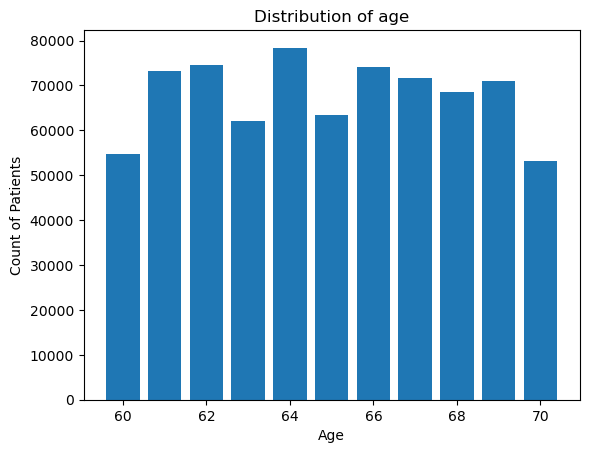

In [29]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

## Pairs

In [30]:
counts = med1.groupby(["ITEMID", "LABEL"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,,HADM_ID
ITEMID,LABEL,
221794,Furosemide (Lasix),726
225855,Ceftriaxone,155
221824,Haloperidol (Haldol),116
227694,Omeprazole (Prilosec),67
225913,Coumadin (Warfarin),59
228340,Furosemide (Lasix) 500/100,22
222151,Procainamide,2


In [31]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [65]:
labs

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE
6926,23,2082-07-17,M,NaN,0,10944,124321.0,51277,2157-10-19 03:55:00,14.40,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,0 days 08:21:00,75.0
6927,23,2082-07-17,M,NaN,0,10937,124321.0,51249,2157-10-19 03:55:00,34.60,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,0 days 08:21:00,75.0
6928,23,2082-07-17,M,NaN,0,10928,124321.0,50983,2157-10-19 03:55:00,140.00,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,0 days 08:21:00,75.0
6929,23,2082-07-17,M,NaN,0,10946,124321.0,51301,2157-10-19 03:55:00,10.90,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,0 days 08:21:00,75.0
6930,23,2082-07-17,M,NaN,0,10933,124321.0,51222,2157-10-19 03:55:00,13.40,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,0 days 08:21:00,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253087,44052,2114-04-03,M,NaN,0,20427859,162646.0,50893,2187-12-18 03:50:00,8.40,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,AORTIC VALVE STENOSIS\AORTIC VALVE REPLACEMENT...,0,1,4 days 20:35:00,74.0
7253088,44052,2114-04-03,M,NaN,0,20427873,162646.0,51250,2187-12-18 03:50:00,85.00,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,AORTIC VALVE STENOSIS\AORTIC VALVE REPLACEMENT...,0,1,4 days 20:35:00,74.0
7253089,44052,2114-04-03,M,NaN,0,20427877,162646.0,51279,2187-12-18 03:50:00,3.25,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,AORTIC VALVE STENOSIS\AORTIC VALVE REPLACEMENT...,0,1,4 days 20:35:00,74.0
7253090,44052,2114-04-03,M,NaN,0,20427867,162646.0,51006,2187-12-18 03:50:00,37.00,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,AORTIC VALVE STENOSIS\AORTIC VALVE REPLACEMENT...,0,1,4 days 20:35:00,74.0


In [59]:
pd.DataFrame(med1.groupby(["LABEL", "SUBJECT_ID"]).nth(0).reset_index()["LABEL"].value_counts()).reset_index().rename(columns={"index":"MED_NAME", "LABEL":"DATA_POINTS"}).head(10)

,MED_NAME,DATA_POINTS
0,NaCl 0.9%,1157
1,Dextrose 5%,1005
2,PO Intake,940
3,Solution,792
4,Magnesium Sulfate,737
5,Potassium Chloride,712
6,Heparin Sodium (Prophylaxis),648
7,Magnesium Sulfate (Bolus),604
8,Insulin - Regular,601
9,Furosemide (Lasix),563


In [60]:
pd.DataFrame(med1.groupby(["LABEL", "SUBJECT_ID"]).nth(0).reset_index()["LABEL"].value_counts()).reset_index().rename(columns={"index":"MED_NAME", "LABEL":"DATA_POINTS"}).head(10)

,MED_NAME,DATA_POINTS
0,NaCl 0.9%,1157
1,Dextrose 5%,1005
2,PO Intake,940
3,Solution,792
4,Magnesium Sulfate,737
5,Potassium Chloride,712
6,Heparin Sodium (Prophylaxis),648
7,Magnesium Sulfate (Bolus),604
8,Insulin - Regular,601
9,Furosemide (Lasix),563


In [32]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/119180187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/119180187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/119180187.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [33]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [34]:
labs_with_name = pd.merge(labs, labitems, on="ITEMID", how="inner")

In [35]:
labs_with_name

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ROW_ID_x,HADM_ID,ITEMID,CHARTTIME,VALUE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LabTimeFromAdmit,AGE,hours_in,ROW_ID_y,LABEL_y,FLUID_y,CATEGORY_y,LOINC_CODE_y
0,820,2077-04-26,M,2144-03-24 00:00:00,1,545633,193603.0,51250,2144-02-23 06:52:00,89.0,...,0,1,0 days 05:13:00,67.0,5.216667,450,MCV,Blood,Hematology,787-2
1,820,2077-04-26,M,2144-03-24 00:00:00,1,545661,193603.0,51250,2144-02-23 17:43:00,87.0,...,0,1,0 days 16:04:00,67.0,16.066667,450,MCV,Blood,Hematology,787-2
2,820,2077-04-26,M,2144-03-24 00:00:00,1,545682,193603.0,51250,2144-02-24 03:26:00,91.0,...,0,1,1 days 01:47:00,67.0,25.783333,450,MCV,Blood,Hematology,787-2
3,820,2077-04-26,M,2144-03-24 00:00:00,1,545704,193603.0,51250,2144-02-25 06:51:00,90.0,...,0,1,2 days 05:12:00,67.0,53.200000,450,MCV,Blood,Hematology,787-2
4,820,2077-04-26,M,2144-03-24 00:00:00,1,545735,193603.0,51250,2144-02-26 04:49:00,91.0,...,0,1,3 days 03:10:00,67.0,75.166667,450,MCV,Blood,Hematology,787-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744829,66508,2104-03-07,M,2165-07-06 00:00:00,1,23528671,131118.0,51188,2165-04-05 03:47:00,29.0,...,1,1,38 days 16:07:00,61.0,928.116667,388,CD56,Blood,Hematology,8133-1
744830,66508,2104-03-07,M,2165-07-06 00:00:00,1,23530194,131118.0,51188,2165-05-08 05:59:00,6.0,...,1,1,71 days 18:19:00,61.0,1722.316667,388,CD56,Blood,Hematology,8133-1
744831,66508,2104-03-07,M,2165-07-06 00:00:00,1,23532081,131118.0,51188,2165-06-18 08:07:00,57.0,...,1,1,112 days 20:27:00,61.0,2708.450000,388,CD56,Blood,Hematology,8133-1
744832,80805,2121-04-26,M,2189-02-16 00:00:00,1,25409560,185522.0,51241,2189-01-02 06:55:00,256.0,...,0,1,12 days 07:59:00,68.0,295.983333,441,Leukocyte Alkaline Phosphatase,Blood,Hematology,4659-9


In [36]:
lab_unique_names = labs_with_name[labs_with_name.HADM_ID.isin(med1.HADM_ID.unique())]["LABEL_y"].unique()
lab_unique_names

array(['MCV', 'Platelet Count', 'Creatine Kinase (CK)', 'MCH', 'RDW',
       'MCHC', 'Hemoglobin', 'Red Blood Cells',
       'Asparate Aminotransferase (AST)', 'Urea Nitrogen', 'Hematocrit',
       'Alanine Aminotransferase (ALT)', 'Sodium', 'PT', 'Albumin',
       'Amylase', 'Lipase', 'White Blood Cells', 'Alkaline Phosphatase',
       'Bilirubin, Total', 'PTT', 'INR(PT)', 'Lactate Dehydrogenase (LD)',
       'Thyroid Stimulating Hormone', 'Troponin T', 'Anion Gap',
       'Bicarbonate', 'Calcium, Total', 'Chloride', 'Creatinine',
       'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'pO2', 'pCO2',
       'Lactate', 'Calculated Total CO2', 'Base Excess', 'pH',
       'Creatine Kinase, MB Isoenzyme', 'Lymphocytes', 'Monocytes',
       'Neutrophils', 'Eosinophils', 'Basophils', 'Atypical Lymphocytes',
       'Bands', 'Metamyelocytes', 'Myelocytes', 'Nucleated Red Cells',
       'Free Calcium', 'RBC', 'Specific Gravity', 'Epithelial Cells',
       'Creatinine, Urine', 'Osmolality, Uri

In [84]:
l_lab_names = [l.lower() for l in list(lab_unique_names)]
"magnesium" in l_lab_names

True

In [85]:
sorted(lab_unique_names)

['% Hemoglobin A1c',
 '24 hr Creatinine',
 '24 hr Protein',
 '25-OH Vitamin D',
 'Absolute CD3 Count',
 'Absolute CD4 Count',
 'Absolute CD8 Count',
 'Absolute Lymphocyte Count',
 'Acetaminophen',
 'Alanine Aminotransferase (ALT)',
 'Albumin',
 'Albumin, Ascites',
 'Albumin, Body Fluid',
 'Albumin, Pleural',
 'Albumin, Urine',
 'Albumin/Creatinine, Urine',
 'Alkaline Phosphatase',
 'Alpha-Fetoprotein',
 'Alveolar-arterial Gradient',
 'Ammonia',
 'Amylase',
 'Amylase, Ascites',
 'Amylase, Body Fluid',
 'Amylase, Pleural',
 'Anion Gap',
 'Anticardiolipin Antibody IgG',
 'Anticardiolipin Antibody IgM',
 'Antithrombin',
 'Asparate Aminotransferase (AST)',
 'Atypical Lymphocytes',
 'Bacteria',
 'Bands',
 'Base Excess',
 'Basophils',
 'Beta-2 Microglobulin',
 'Bicarbonate',
 'Bicarbonate, Urine',
 'Bilirubin, Direct',
 'Bilirubin, Indirect',
 'Bilirubin, Total',
 'Bilirubin, Total, Ascites',
 'Bilirubin, Total, Body Fluid',
 'Bilirubin, Total, Pleural',
 'Blasts',
 'Bleeding Time',
 'Broad C

In [37]:
counts

,,HADM_ID
ITEMID,LABEL,
221794,Furosemide (Lasix),726
225855,Ceftriaxone,155
221824,Haloperidol (Haldol),116
227694,Omeprazole (Prilosec),67
225913,Coumadin (Warfarin),59
228340,Furosemide (Lasix) 500/100,22
222151,Procainamide,2


In [ ]:
'Magnesium','Magnesium, Urine', 

'Bilirubin, Direct',
 'Bilirubin, Indirect',
 'Bilirubin, Total',
 'Bilirubin, Total, Ascites',
 'Bilirubin, Total, Body Fluid',
 'Bilirubin, Total, Pleural',
 
'Prolactin'



INR, magnesium, ANA

In [68]:
# final_significant_med_lab_pairs = pd.read_csv(os.path.join(res, "significant_intersection_trends_and_med_effect_lab_med_all_new.csv"))

In [69]:
# d = final_significant_med_lab_pairs.sort_values(by=['FDR Benjamini Corrected_y', 'FDR Benjamini Corrected_x']).head(20)[["MED_NAME", "LAB_NAME"]].to_dict()

In [70]:
# d = {k : list(d[k].values()) for k in d}

In [38]:
meds = []
labtests = []

meds.append("Furosemide (Lasix)")
labtests.append("Magnesium")

meds.append("Furosemide (Lasix)")
labtests.append("Magnesium, Urine")

meds.append("Furosemide (Lasix) 500/100")
labtests.append("Magnesium")

meds.append("Furosemide (Lasix) 500/100")
labtests.append("Magnesium, Urine")

meds.append("Ceftriaxone")
labtests.append("Bilirubin, Direct")
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Indirect')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total, Ascites')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total, Body Fluid')
meds.append("Ceftriaxone")
labtests.append('Bilirubin, Total, Pleural')

meds.append("Haloperidol (Haldol)")
labtests.append('Prolactin')

meds.append('Omeprazole (Prilosec)')
labtests.append('Vitamin B12')

meds.append("Coumadin (Warfarin)")
labtests.append('INR(PT)')

meds.append("Procainamide")
labtests.append('Alanine Aminotransferase (ALT)')

# meds.append("Procainamide")
# labtests.append('Anticardiolipin Antibody IgM')

med_vals = list(meds)
labtest_vals = list(labtests)



In [39]:
[i for i in zip(med_vals, labtest_vals)]

[('Furosemide (Lasix)', 'Magnesium'),
 ('Furosemide (Lasix)', 'Magnesium, Urine'),
 ('Furosemide (Lasix) 500/100', 'Magnesium'),
 ('Furosemide (Lasix) 500/100', 'Magnesium, Urine'),
 ('Ceftriaxone', 'Bilirubin, Direct'),
 ('Ceftriaxone', 'Bilirubin, Indirect'),
 ('Ceftriaxone', 'Bilirubin, Total'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural'),
 ('Haloperidol (Haldol)', 'Prolactin'),
 ('Omeprazole (Prilosec)', 'Vitamin B12'),
 ('Coumadin (Warfarin)', 'INR(PT)'),
 ('Procainamide', 'Alanine Aminotransferase (ALT)')]

In [40]:
t_med1 = med1[med1["LABEL"].isin(med_vals)]
t_med2 = med2[med2["LABEL"].isin(med_vals)]

In [41]:
t_labs = labs[labs["LABEL"].isin(labtest_vals)]

In [42]:
t_med1.shape, t_med2.shape, t_labs.shape

((1147, 64), (813, 63), (51016, 39))

## Before After Trend Calculation

In [43]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [44]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [45]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [46]:
window = (1,25,4)

In [47]:
def get_vals(r):

    row = r.copy()
    for i in range(window[0], window[1], window[2]):

        if i==1:
            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

            b_window_start = row["MedTimeFromAdmit"].total_seconds()
            b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
            lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"before_abs_0_0"] = {}
                row[f"before_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

            lab_vals = labs[labs["HADM_ID"]==row["HADM_ID"]]
            med2_bool = check_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
            a_window_start = row["MedTimeFromAdmit"].total_seconds()
            a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
            lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            if med2_bool:
                med2_val = get_med2(row)
                lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"after_abs_0_0"] = {}
                row[f"after_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"after_abs_0_0"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"after_time_0_0"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
    
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (i*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{i}_{window[2]}"] = {}
            row[f"before_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        lab_vals = labs[labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (i*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{i}_{window[2]}"] = {}
            row[f"after_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{i}_{window[2]}"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{i}_{window[2]}"] = lab_vals.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
        
    return row

In [48]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_a = [f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_b.extend([f"before_{t}_0_0" for t in all_types])
cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [49]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [50]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,after_abs_13_4,after_time_13_4,before_abs_17_4,before_time_17_4,after_abs_17_4,after_time_17_4,before_abs_21_4,before_time_21_4,after_abs_21_4,after_time_21_4
586,357,2135-03-22,M,2201-08-02 00:00:00,1,225855,101651,259107.0,2199-10-20 13:00:00,2199-10-20 13:01:00,...,"{50868: 6.0, 50882: 34.0, 50893: 8.6, 50902: 1...","{50868: 16.016666666666666, 50882: 16.01666666...",{},{},{},{},{},{},{},{}
782,533,2101-07-30,M,NaN,0,221794,100009,253656.0,2162-05-18 08:18:00,2162-05-18 08:19:00,...,{},{},{},{},{},{},{},{},{},{}
973,975,2074-05-16,M,2142-06-21 00:00:00,1,221794,175734,286445.0,2142-05-16 16:00:00,2142-05-16 16:01:00,...,{},{},{51237: 1.9},{51237: 19.166666666666668},{},{},"{50960: 1.9, 51237: 2.4}","{50960: 23.1, 51237: 23.1}",{},{}
1016,975,2074-05-16,M,2142-06-21 00:00:00,1,225855,175734,243103.0,2142-06-20 21:49:00,2142-06-20 21:50:00,...,{},{},"{50960: 2.1, 51237: 1.2}","{50960: 18.150000000000002, 51237: 18.15000000...",{},{},"{50861: 34.0, 50885: 0.4, 50960: 2.3, 51237: 1.3}","{50861: 21.766666666666666, 50885: 21.76666666...",{},{}
1155,2208,2120-10-04,M,2191-10-17 00:00:00,1,225855,162248,259196.0,2190-08-20 13:41:00,2190-08-20 13:42:00,...,{},{},{},{},{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320870,77690,2042-04-05,M,NaN,0,227694,121387,247506.0,2110-11-23 07:56:00,2110-11-23 07:57:00,...,{},{},{},{},"{50868: 12.0, 50882: 20.0, 50893: 8.0, 50902: ...","{50868: 20.5, 50882: 20.5, 50893: 20.5, 50902:...",{},{},"{50802: -2.0, 50804: 19.0, 50816: 92.0, 50818:...","{50802: 23.35, 50804: 23.35, 50816: 23.35, 508..."
320874,77690,2042-04-05,M,NaN,0,225913,121387,247506.0,2110-11-24 16:00:00,2110-11-24 16:01:00,...,{},{},{},{},{},{},{},{},{},{}
321377,43742,2113-08-29,M,2175-12-09 00:00:00,1,221794,191527,216409.0,2175-12-01 22:44:00,2175-12-01 22:45:00,...,"{51237: 1.0, 51274: 11.9, 51275: 29.8}","{51237: 16.583333333333336, 51274: 16.58333333...","{50960: 2.4, 51237: 1.0}","{50960: 17.733333333333334, 51237: 17.73333333...",{51275: 38.8},{51275: 20.333333333333332},{},{},"{50868: 15.0, 50882: 23.0, 50893: 9.3, 50902: ...","{50868: 22.716666666666665, 50882: 22.71666666..."
321549,43786,2078-03-24,M,NaN,0,221794,151092,230331.0,2138-07-16 10:40:00,2138-07-16 10:41:00,...,{},{},{},{},"{50868: 7.0, 50882: 31.0, 50902: 102.0, 50912:...","{50868: 17.683333333333337, 50882: 17.68333333...",{51237: 1.1},{51237: 22.633333333333333},{},{}


In [51]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval.csv"))

In [80]:
# import ast
# for c in cols:
#     temp[c] = temp[c].apply(lambda x : ast.literal_eval(x))


In [81]:
# [c for c in cols for i in temp[c].to_list() if len(i)>0]

In [52]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64', 'LAB_ITEMID':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [53]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [54]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [55]:
t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final = t_final

In [56]:
final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [57]:
final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/3901652037.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))


In [58]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [59]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [60]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_abs_1_4_sp', (1020, 99)),
 ('before_time_1_4_sp', (1020, 99)),
 ('before_abs_5_4_sp', (1266, 99)),
 ('before_time_5_4_sp', (1266, 99)),
 ('before_abs_9_4_sp', (1000, 99)),
 ('before_time_9_4_sp', (1000, 99)),
 ('before_abs_13_4_sp', (860, 99)),
 ('before_time_13_4_sp', (860, 99)),
 ('before_abs_17_4_sp', (806, 99)),
 ('before_time_17_4_sp', (806, 99)),
 ('before_abs_21_4_sp', (624, 99)),
 ('before_time_21_4_sp', (624, 99)),
 ('before_abs_0_0_sp', (160, 99)),
 ('before_time_0_0_sp', (160, 99))]

In [61]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{i}_{window[2]}_sp", f"before_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2]) ]
cols_a_sp = [(f"after_{a_t[0]}_{i}_{window[2]}_sp", f"after_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2])]
cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [62]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [63]:
plot_data.keys()

dict_keys(['before_abs_1_4_sp', 'before_abs_5_4_sp', 'before_abs_9_4_sp', 'before_abs_13_4_sp', 'before_abs_17_4_sp', 'before_abs_21_4_sp', 'before_abs_0_0_sp'])

In [64]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [65]:
cols_sp

[('before_abs_1_4_sp', 'before_time_1_4_sp'),
 ('before_abs_5_4_sp', 'before_time_5_4_sp'),
 ('before_abs_9_4_sp', 'before_time_9_4_sp'),
 ('before_abs_13_4_sp', 'before_time_13_4_sp'),
 ('before_abs_17_4_sp', 'before_time_17_4_sp'),
 ('before_abs_21_4_sp', 'before_time_21_4_sp'),
 ('before_abs_0_0_sp', 'before_time_0_0_sp'),
 ('after_abs_1_4_sp', 'after_time_1_4_sp'),
 ('after_abs_5_4_sp', 'after_time_5_4_sp'),
 ('after_abs_9_4_sp', 'after_time_9_4_sp'),
 ('after_abs_13_4_sp', 'after_time_13_4_sp'),
 ('after_abs_17_4_sp', 'after_time_17_4_sp'),
 ('after_abs_21_4_sp', 'after_time_21_4_sp'),
 ('after_abs_0_0_sp', 'after_time_0_0_sp')]

In [66]:
cols_d = dict(cols_sp)

In [67]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_5_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_9_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_8

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_13_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_17_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_21_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_8

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_0_0_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_80825/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_8

In [68]:
p_data.keys()

dict_keys([('Ceftriaxone', 'INR(PT)'), ('Furosemide (Lasix)', 'INR(PT)'), ('Haloperidol (Haldol)', 'INR(PT)'), ('Furosemide (Lasix) 500/100', 'INR(PT)'), ('Coumadin (Warfarin)', 'INR(PT)'), ('Procainamide', 'INR(PT)'), ('Furosemide (Lasix) 500/100', 'Magnesium'), ('Furosemide (Lasix)', 'Magnesium'), ('Haloperidol (Haldol)', 'Magnesium'), ('Ceftriaxone', 'Magnesium'), ('Omeprazole (Prilosec)', 'Magnesium'), ('Coumadin (Warfarin)', 'Magnesium'), ('Procainamide', 'Magnesium'), ('Furosemide (Lasix)', 'Alanine Aminotransferase (ALT)'), ('Ceftriaxone', 'Alanine Aminotransferase (ALT)'), ('Furosemide (Lasix)', 'Bilirubin, Total'), ('Ceftriaxone', 'Bilirubin, Total'), ('Furosemide (Lasix)', 'Bilirubin, Direct'), ('Furosemide (Lasix)', 'Bilirubin, Indirect'), ('Omeprazole (Prilosec)', 'INR(PT)'), ('Haloperidol (Haldol)', 'Alanine Aminotransferase (ALT)'), ('Haloperidol (Haldol)', 'Bilirubin, Total'), ('Coumadin (Warfarin)', 'Alanine Aminotransferase (ALT)'), ('Coumadin (Warfarin)', 'Bilirubin, 

In [69]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [103]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [78]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [79]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [80]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [81]:
lab_units_mapping = labs_with_name.groupby(["LABEL_y", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("LABEL_y").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
LABEL_y,
% Hemoglobin A1c,%
24 hr Creatinine,mg/24hr
24 hr Protein,mg/24hr
25-OH Vitamin D,ng/mL
Absolute CD3 Count,#/uL
...,...
Young Cells,%
pCO2,mm Hg
pH,units


In [82]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [83]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [84]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [mapping[k[1]] for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [mapping[k[1]] for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [85]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c in zip(data_vals, after_names, corrs):
                if d.shape[0]<2:
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                d = pd.concat([d1, d2], axis=1)

                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name} bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": mapping[before_window],
                    "aw": mapping[int_s(a[-7:-5])],
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stat

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [86]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,INR(PT),Ceftriaxone,(1-5),(1-5),Absolute,0.306647,0.460064,0.518677,0.187826,8
1,INR(PT),Ceftriaxone,(1-5),(5-9),Absolute,0.034305,0.930183,-0.246864,0.521937,9
2,INR(PT),Ceftriaxone,(1-5),(9-13),Absolute,-0.536906,0.088568,-0.133342,0.695906,11
3,INR(PT),Ceftriaxone,(1-5),(13-17),Absolute,0.136014,0.771225,0.036037,0.938861,7
4,INR(PT),Ceftriaxone,(1-5),(17-21),Absolute,0.348078,0.398154,0.323359,0.434639,8
...,...,...,...,...,...,...,...,...,...,...
1051,Alanine Aminotransferase (ALT),Omeprazole (Prilosec),(1-5),(17-21),Percentage,0.546042,0.632268,0.500000,0.666667,3
1052,Alanine Aminotransferase (ALT),Omeprazole (Prilosec),(1-5),(17-21),Ratio,0.546042,0.632268,0.500000,0.666667,3
1053,"Bilirubin, Total",Omeprazole (Prilosec),(1-5),(17-21),Absolute,-0.431802,0.715756,-0.500000,0.666667,3
1054,"Bilirubin, Total",Omeprazole (Prilosec),(1-5),(17-21),Percentage,-0.352858,0.770420,-0.500000,0.666667,3


In [89]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
360,Magnesium,Furosemide (Lasix),(5-9),(17-21),Ratio,-0.290910,0.017802,-0.300057,0.014374,66
353,Magnesium,Furosemide (Lasix),(5-9),(17-21),Percentage,-0.290910,0.017802,-0.300057,0.014374,66
346,Magnesium,Furosemide (Lasix),(5-9),(17-21),Absolute,-0.288090,0.018991,-0.286995,0.019471,66
399,Magnesium,Furosemide (Lasix),(13-17),(5-9),Ratio,-0.431057,0.024782,-0.442390,0.020853,27
392,Magnesium,Furosemide (Lasix),(13-17),(5-9),Percentage,-0.431057,0.024782,-0.442390,0.020853,27
357,Magnesium,Furosemide (Lasix),(5-9),(5-9),Ratio,-0.385599,0.035341,-0.379945,0.038358,30
350,Magnesium,Furosemide (Lasix),(5-9),(5-9),Percentage,-0.385599,0.035341,-0.379945,0.038358,30
385,Magnesium,Furosemide (Lasix),(13-17),(5-9),Absolute,-0.397289,0.040167,-0.398043,0.039756,27
343,Magnesium,Furosemide (Lasix),(5-9),(5-9),Absolute,-0.360945,0.050042,-0.356125,0.053414,30
419,Magnesium,Furosemide (Lasix),(17-21),(1-5),Ratio,-0.238728,0.110094,-0.211535,0.158173,46


In [90]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Spearmans Correlation (p-value)"]).tail(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
340,Magnesium,Furosemide (Lasix),(1-5),(21-25),Ratio,-0.202381,0.311362,-0.311994,0.113126,27
333,Magnesium,Furosemide (Lasix),(1-5),(21-25),Percentage,-0.202381,0.311362,-0.311994,0.113126,27
326,Magnesium,Furosemide (Lasix),(1-5),(21-25),Absolute,-0.264957,0.181671,-0.296331,0.133391,27
386,Magnesium,Furosemide (Lasix),(13-17),(9-13),Absolute,-0.214312,0.283075,-0.286174,0.147867,27
400,Magnesium,Furosemide (Lasix),(13-17),(9-13),Ratio,-0.194980,0.329757,-0.284667,0.150107,27
393,Magnesium,Furosemide (Lasix),(13-17),(9-13),Percentage,-0.194980,0.329757,-0.284667,0.150107,27
405,Magnesium,Furosemide (Lasix),(17-21),(1-5),Absolute,-0.220807,0.140309,-0.213480,0.154294,46
412,Magnesium,Furosemide (Lasix),(17-21),(1-5),Percentage,-0.238728,0.110094,-0.211535,0.158173,46
419,Magnesium,Furosemide (Lasix),(17-21),(1-5),Ratio,-0.238728,0.110094,-0.211535,0.158173,46
433,Magnesium,Furosemide (Lasix),(21-25),(1-5),Percentage,-0.047289,0.807546,-0.242753,0.204497,29
